# sklearn.model_selection.cross_val_score
Ao utilizar cross-validation, nós submetemos o processo de modelagem de dados em diferentes grupos de dados com o objetivo de adquirir várias métricas da qualidade do modelo.

Por exemplo: 
* Imagine uma base de dados dividida em 4 partes, sendo que cada parte representa 25% do total. Em cross-validation, nós chamamos cada parte de __folds__.
* Em seguida, nós utilizamos o 1º fold como dados de validação (holdout) e utilizamos os outros 3 folds como dados de treinamento. Então teremos uma métrica da qualidade do modelo baseada no 1º fold.
* Este processo é repetido para todos os folds.

Nas linhas seguintes, vamos calcular a média após obter o resultado de todos os experimentos do cross-validation.

É importante destacar que este processo pode levar um tempo considerável de processamento, pois são calculados vários modelos.
![Folds in Cross-Validation](folds-cross-validation.jpg)

In [1]:
import pandas as pd

data = pd.read_csv('data.csv')

# Seleciona as colunas features e target
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

In [2]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


## Métricas de Avaliações
Por padrão, a função __cross_val_score()__ retorna a acurácia do modelo. Contudo, é possível alterar a métrica de avaliação da qualidade do modelo através do parâmetro _scoring_. A documentação oficial do scikit-learn apresenta uma lista de opções com [Model evaluation: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html).

Em seguida, definimos uma função que:
* Aplica o Cross-Validation com o modelo RandomForestRegressor 
* Retorna a média da avaliação da qualidade do modelo após aplicar o Cross-Validation

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
    """
    Retorna a média da acurácia em 4 folds do modelo Random Forest.
    
    :params
        n_estimators: número de trees no modelo
    """
    pipeline = make_pipeline(SimpleImputer(), RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    
    scores = cross_val_score(pipeline, X, y, cv=4)
    
    return scores.mean()

### Output
Métrica de avaliação do modelo RandomForestRegressor com diferentes números de árvores

In [4]:
results = dict()

# Testaremos os modelos com 50, 100, 150, 200, 250, 300, 350 e 400 árvores
for i in range(1, 9):
    results[50*i] = get_score(50*i)
    
results

{50: 0.8456200105104792,
 100: 0.8458442987652584,
 150: 0.8479690454485017,
 200: 0.8510252259413396,
 250: 0.8513442156948992,
 300: 0.8514553484197355,
 350: 0.8514621824372346,
 400: 0.8512964933477633}

### Visualização das métricas
O modelo com 350 árvores apresenta o melhor resultado.

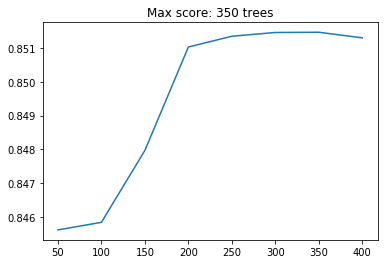

In [5]:
import operator
import matplotlib.pyplot as plt
%matplotlib inline

# Max value in dict
max_value = max(results.items(), key=operator.itemgetter(1))[0]

plt.plot(results.keys(), results.values())
plt.title(f'Max score: {max_value} trees')
plt.show()